In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

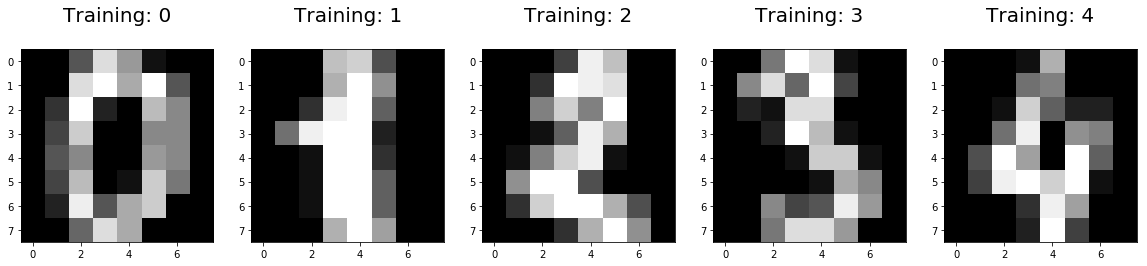

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
 

In [11]:
type(digits.data[0])

numpy.ndarray

In [12]:
len(digits.data[0])

64

In [16]:
from sklearn.model_selection import train_test_split
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 64)
(1797,)
(1347, 64)
(450, 64)
(1347,)
(450,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LogReg = LogisticRegression()

In [20]:
LogReg.fit(X_train, y_train)

C:\Users\hritv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hritv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
LogReg.predict(X_test[0].reshape(1, -1))

array([2])

In [25]:
LogReg.predict(X_test[:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [34]:
predictions = LogReg.predict(X_test)
predictions.shape

(450,)

In [35]:
score = LogReg.score(X_test, y_test)
score

0.9533333333333334

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9533333333333334

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm.shape

(10, 10)

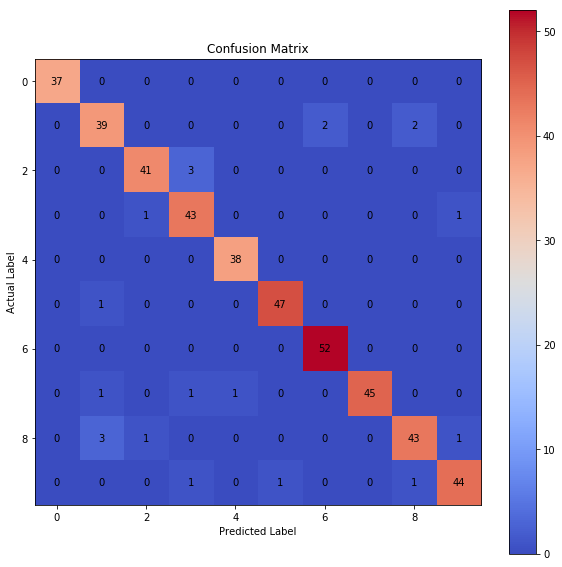

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap='coolwarm');
plt.title('Confusion Matrix');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [62]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
        index +=1

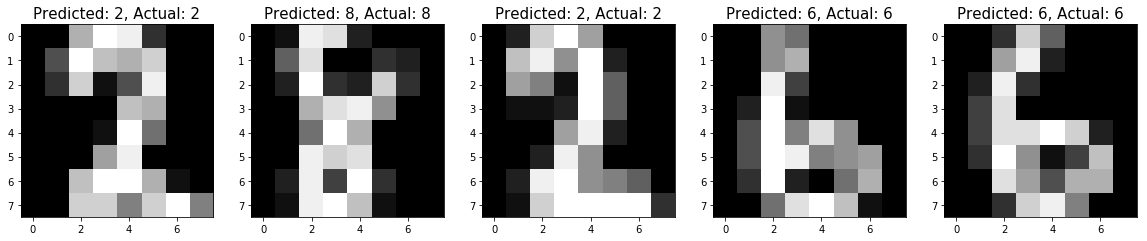

In [72]:
#Can't get fontsize???
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

Heavier datasets


In [1]:
DIR='C:\Python\Datasets'
import pandas as pd
train_data = pd.read_csv(DIR+'/train.csv', delimiter=',')
train_inputs = train_data.ix[:,0]
#train_labels = train_data.drop(0, axis=1)
test_data = pd.read_csv(DIR+'/test.csv', delimiter=',')

C:\Users\hritv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
